# K-Means

K-means is an unsupervised machine learning technique that tries to separate the data into k clusters by iteratively moving every centroid towards the 'center of gravity' of every point under its influence.

In [1]:
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

from support import ClusteredDataset, Colors

In [2]:
class Kmeans:
    __slots__ = ['__centroids']
    def __init__(self):
        self.__centroids = None
    
    @property
    def centroids(self):
        return self.__centroids      
        
    def __valid(self, X, k, min_distance, max_iter, repetitions):
        # Sanity Checks
        if (len(np.shape(X)) != 2):
            raise ValueError("The input data must be a 2-Dimensonal matrix.")
            return False
        
        if min_distance < 0:
            raise ValueError("The minimal distance must be a positive value.")
            return False
            
        if max_iter < 1 or type(max_iter) != int:
            raise ValueError("Max iterations must be an integer greater than 1.")
            return False
        
        if repetitions < 1 or type(repetitions) != int:
            raise ValueError("Max iterations must be an integer greater than 1.")
            return False
        
        return True  
    
    def train_step(self, X, centroids, min_distance=0.1):
        old_centroid = centroids.copy()
        
        # Get distances to each center
        dst = np.empty( (X.shape[0], 0) )
        for c in centroids:
            d = np.linalg.norm(X-c, axis=-1).reshape((-1,1))
            dst = np.hstack( (dst, d) )
        
        # Get the index of the closest centroid for each point
        labels = dst.argmin(axis=-1)
        
        # Update the position of each centroid
        for i in range(centroids.shape[0]):
            centroids[i] = np.average(X[labels == i], axis=0)
        
        # Find how much the centroids have changed
        # in this iteration
        error = 0
        for a,b in zip(old_centroid, centroids):
            error += np.linalg.norm(a - b)
        
        if error < min_distance:
            return True
        else:
            return False
    
    def train(self, X, k = 2, min_distance = 0.1, max_iter = 100, repetitions = 1):
        if not self.__valid(X,k,min_distance,max_iter,repetitions):
            return
                
        collection = []
        for i in range(0,repetitions):
            # Create k centroids
            # using points on the dataset to minimize chances of
            # odd values (local minima)
            index = random.sample(range(np.shape(X)[0]), k)
            centroids = np.array(X[index]).astype(np.float)

            # Iteratively update the position of each centroid
            for _ in range(max_iter):
                end = self.train_step(X, centroids, min_distance)
                
                if end:
                    break
                    
            # Sort centroids (to properly compare them later)
            # Otherwise, we could get the same centroids in different
            # positions and it would compute as different centroids
            x = (centroids[:,0],)
            for i in range(1,centroids.shape[-1]):
                x = x + (centroids[:,i])
            collection.append(centroids[np.lexsort(x)])
        
        if repetitions < 2:
            self.__centroids = collection[0]
        
        # Get the best centroid
        # i.e. the one that minimizes its distance with all the other
        # centroids.
        collection = np.array(collection)
        max_value = float('Inf')
        index = -1
        for i,c in enumerate(collection):
            w = np.sum(np.linalg.norm(c-collection, axis=-1))
            if w < max_value:
                index = i
                
        self.__centroids = collection[i]
        
    def predict(self, X):
        pass
            

## Example

In [3]:
# Define how many groups of data should be
# generated for the training set
# (number_of_points, center)
groups = (
    (20, [40,0]),
    (15, [ 45,0]),
    ( 3, [ 43,5])
)

# How many clusters are we trying to find
clusters = 3

### Generate dataset

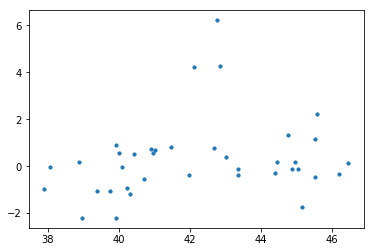

In [4]:
X,_ = ClusteredDataset(*groups)

#X = np.vstack( (GenerateSet(type_a_points, [-2,0]), generate_set(type_b_points,[2,0])) ) 
#y = np.array(([0]*type_a_points) + ([1]*type_b_points))
plt.scatter(X[:,0], X[:,1], s=10)
plt.show()

### Predict clusters step-by-step

By running the algorithm step-by-step, we can see how the position of the centroids keep evolving.

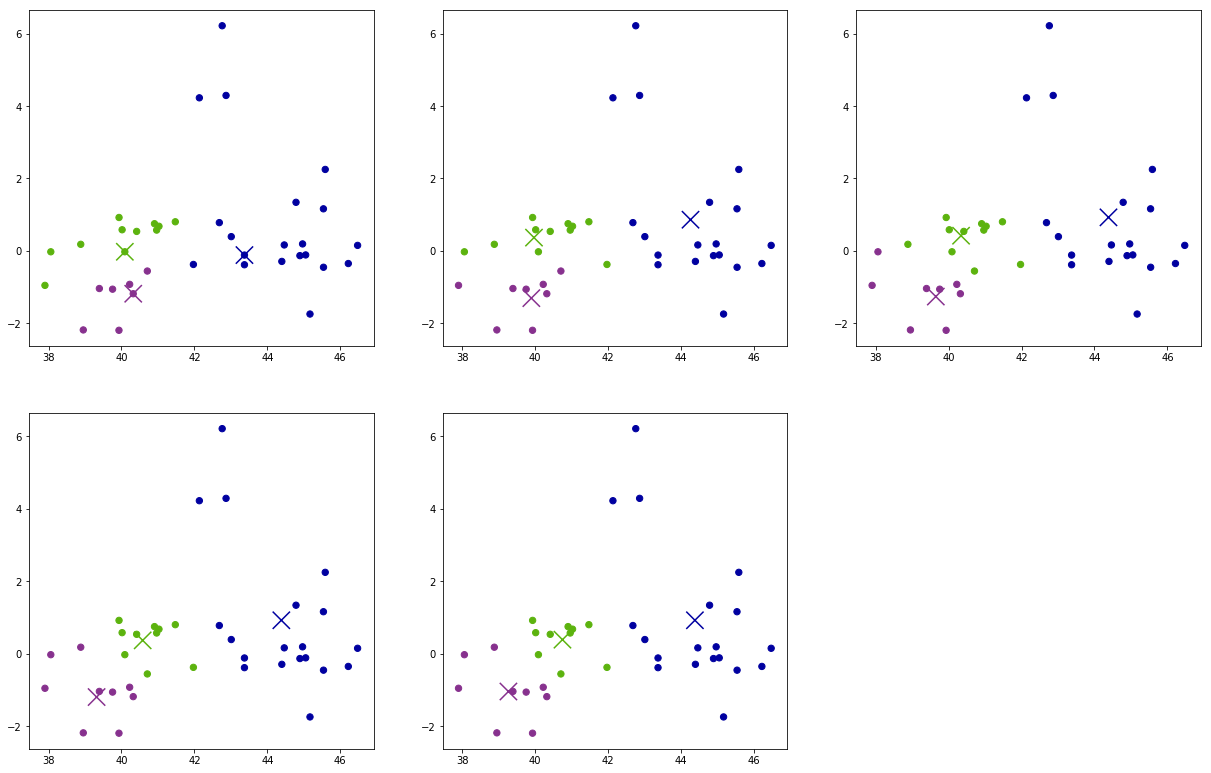

In [6]:
# Define the initial centroid
index = random.sample(range(np.shape(X)[0]), clusters)
centroids = np.array(X[index]).astype(np.float)
km = Kmeans()

plt.figure(figsize=(21,21))

for i in range(9):
    # Get a label for each point in the dataset
    dst = np.empty( (X.shape[0], 0) )
    for c in centroids:
        d = np.linalg.norm(X-c, axis=-1).reshape((-1,1))
        dst = np.hstack( (dst, d) )
    y = dst.argmin(axis=-1)
    
    ax = plt.subplot(331 + i)
    ax.scatter(X[:,0], X[:,1], s=40, c=Colors(y))
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', s=300, c=Colors(list(range(clusters))))
    
    
    if km.train_step(X, centroids):
        break
plt.show()


### Predict clusters using repetition in training

K-means can get struck in local minima. Thus, it can be a good practice to run the algorithm multiple times with different starting points and use the centroids that are repeated the most.

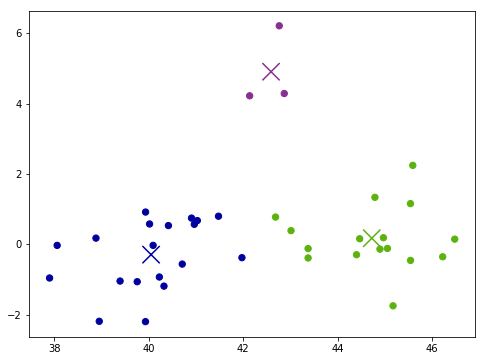

In [7]:
km.train(X, k=clusters, repetitions=7)
centroids = km.centroids

    
# Get a label for each point in the dataset
dst = np.empty( (X.shape[0], 0) )
for c in centroids:
    d = np.linalg.norm(X-c, axis=-1).reshape((-1,1))
    dst = np.hstack( (dst, d) )
y = dst.argmin(axis=-1)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], s=40, c=Colors(y))
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=300, c=Colors(list(range(clusters))))
    
plt.show()